In [1]:
from tensorflow.keras.utils import normalize
import os
import glob
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys
import random

np.set_printoptions(threshold=sys.maxsize)

In [2]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d zahidhussain909/retina-segmentation-saved-model

import zipfile
zipref=zipfile.ZipFile("/content/retina-segmentation-saved-model.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/retina-segmentation-saved-model.zip

100% 21.0M/21.0M [00:01<00:00, 24.4MB/s]
100% 21.0M/21.0M [00:01<00:00, 16.2MB/s]


In [3]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d mohamedberrimi/oct-images-balanced-version
import zipfile
zipref=zipfile.ZipFile("/content/oct-images-balanced-version.zip",'r')
zipref.extractall()
zipref.close()

!rm -rf /content/oct-images-balanced-version.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 4.15G/4.15G [02:28<00:00, 34.2MB/s]
100% 4.15G/4.15G [02:28<00:00, 30.1MB/s]


In [4]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/retina_segmentation_8_layer (1).hdf5')

In [5]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d zahidhussain909/best-model-oct-denoising
import zipfile

zipref=zipfile.ZipFile("/content/best-model-oct-denoising.zip",'r')
zipref.extractall()
zipref.close()


!rm -rf /content/best-model-oct-denoising.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 7.00M/7.21M [00:00<00:00, 13.4MB/s]
100% 7.21M/7.21M [00:00<00:00, 9.74MB/s]


In [6]:
import tensorflow as tf
model_den = tf.keras.models.load_model("/content/best_model_OCT_denoising.h5")

In [7]:

test_test = []

SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

test_path = "/content/OCTID/Age-related-Macular-Degeneration-Retinal-OCT-images"


for directory_path in glob.glob(test_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_test.append(img) 
        if len(test_test) > 100:
            break
        else:
            pass

    
test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)

AxisError: ignored

In [ ]:


test_test = []

SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

test_path = "/content/OCT2017 /train/NORMAL"


for directory_path in glob.glob(test_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        test_test.append(img) 
        if len(test_test) > 100:
            break
        else:
            pass

    
test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)

AxisError: ignored

In [ ]:
img_path='/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg'
image = cv.imdecode(np.fromfile('/content/AMRD2.jpeg', dtype=np.uint8), 0)
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
dst = cv.medianBlur(img,95)
plt.imshow(dst,cmap='gray')

In [9]:
import os
from keras.preprocessing import image
import tensorflow as tf 
import keras 
import cv2
import numpy as np
from matplotlib import pyplot as plt
import keras
import tensorflow as tf



val_image = []

img = tf.keras.utils.load_img('/content/22 OD - Copy.jpeg', target_size=(180,180), color_mode= 'grayscale')
img = tf.keras.utils.img_to_array(img)
img = img/255
val_image.append(img)
train_df = np.array(val_image)

In [11]:
import time

1/1 [==============================] - 0s 77ms/step
Execution time: 0.15665984153747559 seconds


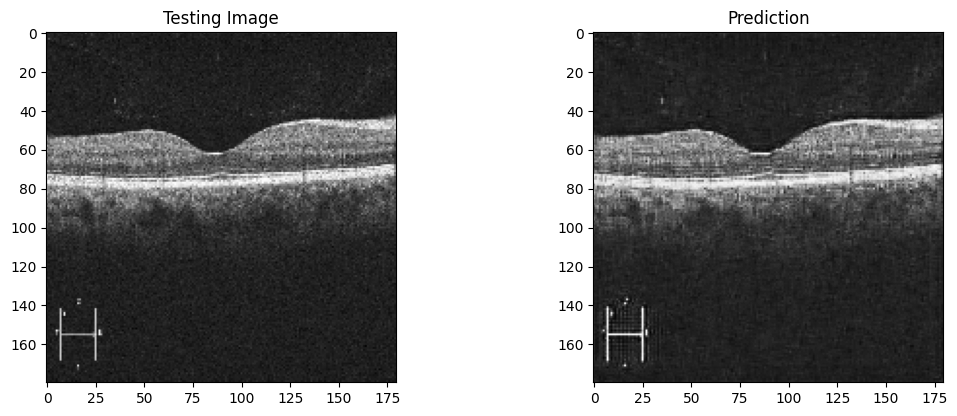

In [12]:
test_test = []
SIZE_X = 180
SIZE_Y = 180

img = cv.imread('/content/22 OD - Copy.jpeg', 0)       
img = cv.resize(img, (SIZE_Y, SIZE_X))
st = time.time()
pred= model_den.predict(train_df)
et = time.time()
pred=np.reshape(pred, (180,180))
plt.figure(figsize=(20, 10))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img,cmap='gray')

plt.subplot(232)
plt.title('Prediction')
plt.imshow(pred, cmap='gray')
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

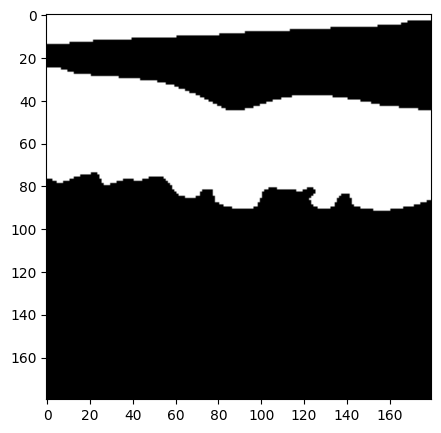

In [ ]:
dst = cv.medianBlur(pred,1)
blurred = cv.GaussianBlur(dst, (17,17), 0)
#ret,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
ret,th2 = cv.threshold(blurred,0.215,1,cv.ADAPTIVE_THRESH_MEAN_C)
th2[th2!=0] = 255
plt.figure(figsize=(5, 5))
plt.imshow(th2,cmap='gray')

In [ ]:
np.shape(img)

(180, 180)

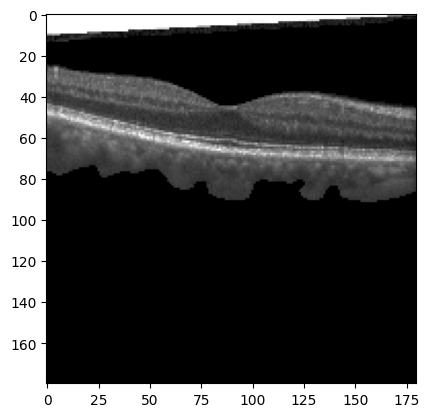

In [ ]:
fin_img= np.multiply(th2,img)

plt.imshow(fin_img,cmap='gray')

In [ ]:
test1 = test_test[25]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)
plt.figure(figsize=(10, 10))
test_img = test1[:,:,0]
plt.title('Testing Image')
cr=100
test_img = test_img[cr:640, 0:640]
pix = test_img[0]
repetitions = cr
pix = np.tile(pix, (repetitions, 1))
test_img = np.vstack((pix,test_img))
plt.imshow(test_img,cmap='gray')


1/1 [==============================] - 2s 2s/step


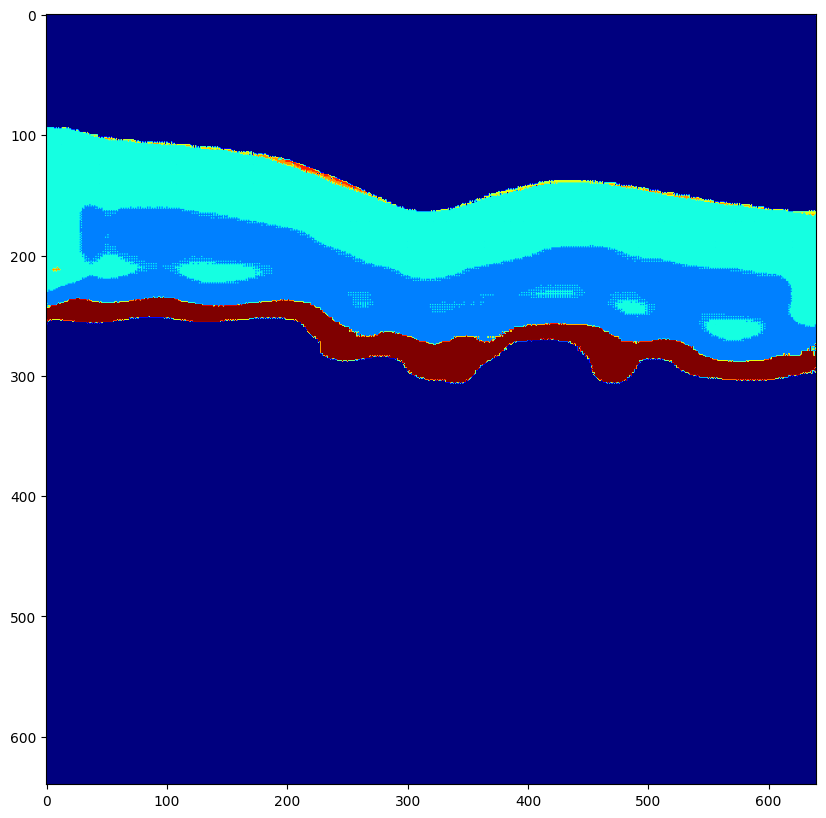

In [ ]:
test_test = []
SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

img = th2



img = cv2.resize(img, (SIZE_Y, SIZE_X))

cr=50
test_img = img[cr:640, 0:640]
pix = test_img[0]
pix = np.tile(pix, (cr, 1))

test_img = np.vstack((pix,test_img))

test_test.append(test_img) 

test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)


test1 = test_test[0]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(10, 10))
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')


In [ ]:
test_test = []
SIZE_X = 640
SIZE_Y = 640
n_classes= 9 

img = pred  
img = cv2.resize(img, (SIZE_Y, SIZE_X))
test_test.append(img) 

test_test = np.array(test_test)

test_test = np.expand_dims(test_test, axis=3)
test_test = normalize(test_test, axis=1)


test1 = test_test[0]
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(10, 10))
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')


NameError: ignored

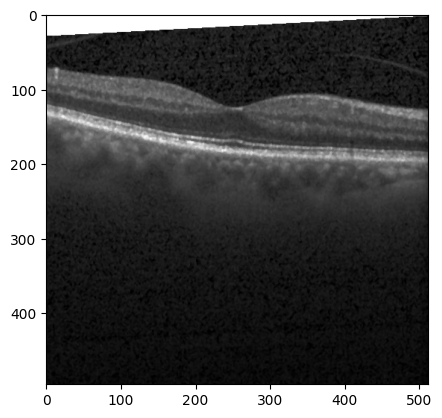

In [ ]:
img_path='/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg'
image = cv.imdecode(np.fromfile('/content/AMRD2.jpeg', dtype=np.uint8), 0)
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
dst = cv.medianBlur(img,3)
plt.imshow(dst,cmap='gray')

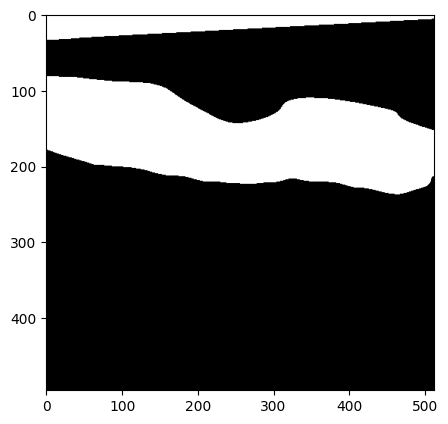

In [ ]:
ratio=1
img_path='/content/OCT_Balanced_Version/Balanced/NORMAL/NORMAL-1004480-2.jpeg'
image = cv.imdecode(np.fromfile('/content/AMRD2.jpeg', dtype=np.uint8), 0)
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
dst = cv.medianBlur(img,85)
blurred = cv.GaussianBlur(dst, (17,17), 0)
#ret,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
ret,th2 = cv.threshold(blurred,60,255,cv.ADAPTIVE_THRESH_MEAN_C)
th2[th2!=0] = 255
plt.figure(figsize=(5, 5))
plt.imshow(th2,cmap='gray')

In [ ]:
for i in range(len(th2)):
    for j in range(len(th2[i])): 
        if th2[i][j]==255:
            th2[i][j] = 1
        else:
            pass

In [ ]:
np.unique(th2)

array([0, 1], dtype=uint8)

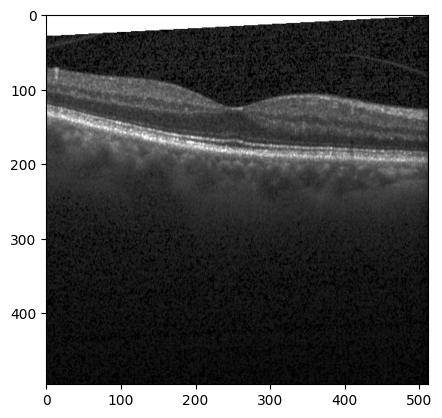

In [ ]:

plt.imshow(img,cmap='gray')


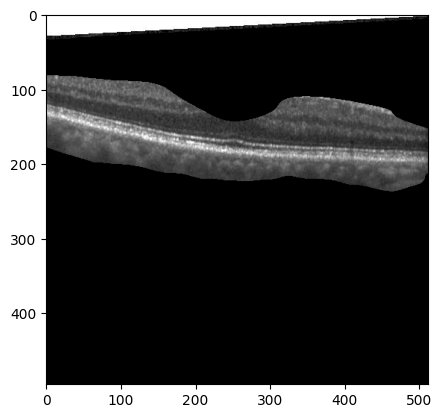

In [ ]:

fin_img= np.multiply(th2,img)

plt.imshow(fin_img,cmap='gray')



In [ ]:
#test1 = test_test[25]
test1 = np.expand_dims(test_img, -1)
test_img_norm=test1[:,:,0][:,:,None]
test=np.expand_dims(test_img_norm, 0)

prediction = (model.predict(test))
predicted_img = np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(40, 20))

plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test1[:,:,0],cmap='gray')

plt.subplot(232)
plt.title('Prediction')
# plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.imshow(predicted_img, cmap='jet')

# plt.imshow(prediction[0,:,:,7], cmap='jet')


In [14]:
def load_prep(filename,img_shape=224):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

In [15]:
classify=load_prep("/content/56 OS - Copy.jpeg")

In [16]:
classify=tf.expand_dims(classify,axis=0)

In [19]:
import tensorflow as tf
classify_model = tf.keras.models.load_model('/content/classify_model4 (1) (1).h5')

In [20]:
st = time.time()
pred=classify_model.predict(classify)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

1/1 [==============================] - 0s 375ms/step
Execution time: 0.43297910690307617 seconds
